In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno

### Load Data

In [5]:
df = pd.read_csv('Xeek_train_subset_clean.csv')

In [6]:
df.describe()

,DEPTH_MD,CALI,RDEP,RHOB,GR,NPHI,PEF,DTC
count,133198.000000,133006.000000,125805.000000,108053.000000,133198.000000,91725.000000,100840.000000,132635.000000
mean,1792.944663,13.199399,1.743774,2.199556,69.553872,0.355602,4.511845,122.700286
std,739.441515,3.561386,13.233330,0.236902,39.328728,0.143857,5.092807,34.234879
min,415.261599,5.946157,0.123068,1.366913,0.109284,-0.023143,1.010027,7.415132
25%,1182.822400,11.381848,0.777323,2.029237,43.244637,0.234927,2.857540,87.899776
50%,1747.524495,12.698571,1.130621,2.162121,66.266132,0.382014,3.780121,135.968094
75%,2413.874901,14.944049,1.644573,2.404375,93.808681,0.480985,5.098502,147.388626
max,3272.024000,25.717396,1856.935059,3.115611,804.298950,0.817310,365.575592,230.432953


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133198 entries, 0 to 133197
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   WELL       133198 non-null  object 
 1   DEPTH_MD   133198 non-null  float64
 2   GROUP      133198 non-null  object 
 3   FORMATION  111632 non-null  object 
 4   CALI       133006 non-null  float64
 5   RDEP       125805 non-null  float64
 6   RHOB       108053 non-null  float64
 7   GR         133198 non-null  float64
 8   NPHI       91725 non-null   float64
 9   PEF        100840 non-null  float64
 10  DTC        132635 non-null  float64
 11  LITH       133198 non-null  object 
dtypes: float64(8), object(4)
memory usage: 12.2+ MB


### Explore Data

In [8]:
df['LITH'].nunique()

11

In [9]:
df['LITH'].unique()

array(['Shale', 'Sandstone', 'Sandstone/Shale', 'Limestone', 'Tuff',
       'Marl', 'Anhydrite', 'Dolomite', 'Chalk', 'Coal', 'Halite'],
      dtype=object)

/home/ubuntu_jc/anaconda3/envs/ml/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


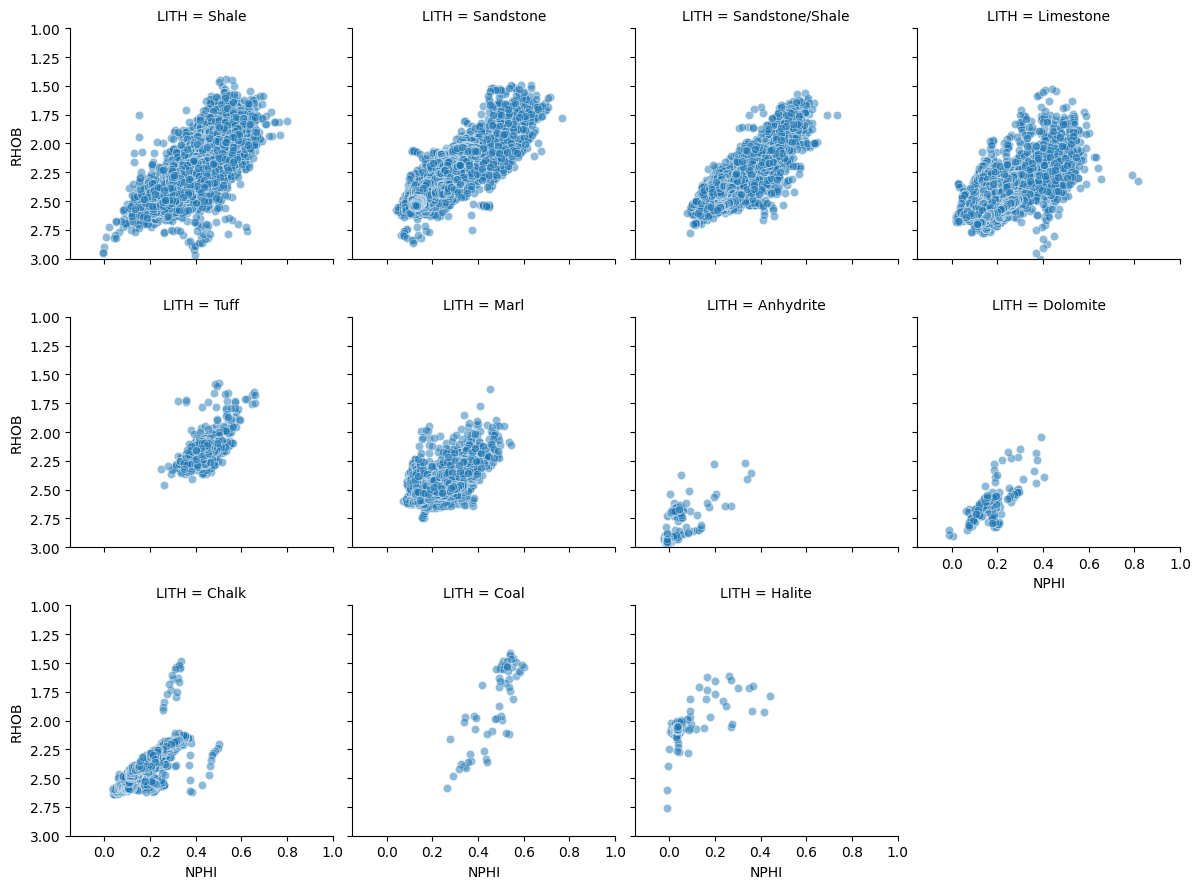

In [10]:
g = sns.FacetGrid(df, col='LITH', col_wrap=4)
g.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.5)
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))

/home/ubuntu_jc/anaconda3/envs/ml/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


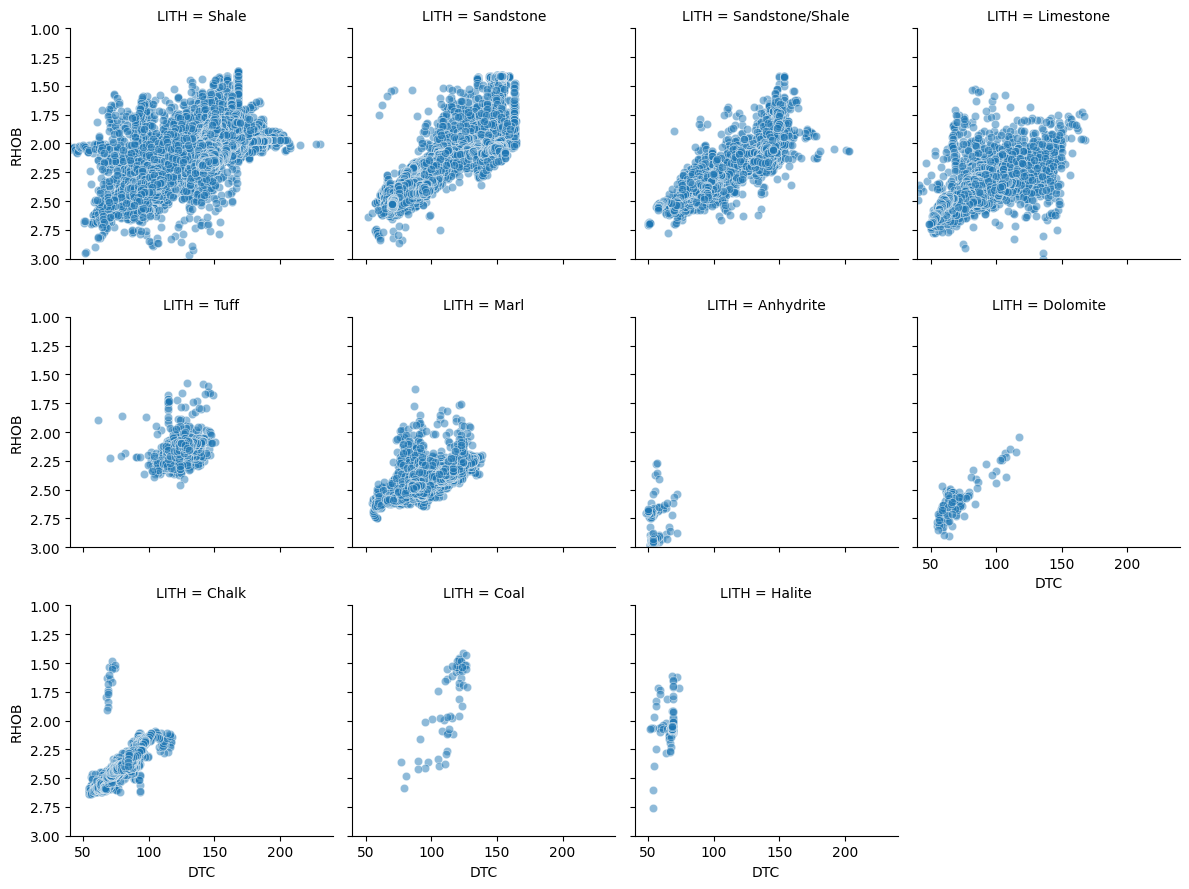

In [11]:
g = sns.FacetGrid(df, col='LITH', col_wrap=4)
g.map(sns.scatterplot, 'DTC', 'RHOB', alpha=0.5)
g.set(xlim=(40, 240))
g.set(ylim=(3, 1))

### Deal With Missing Data

<Axes: >

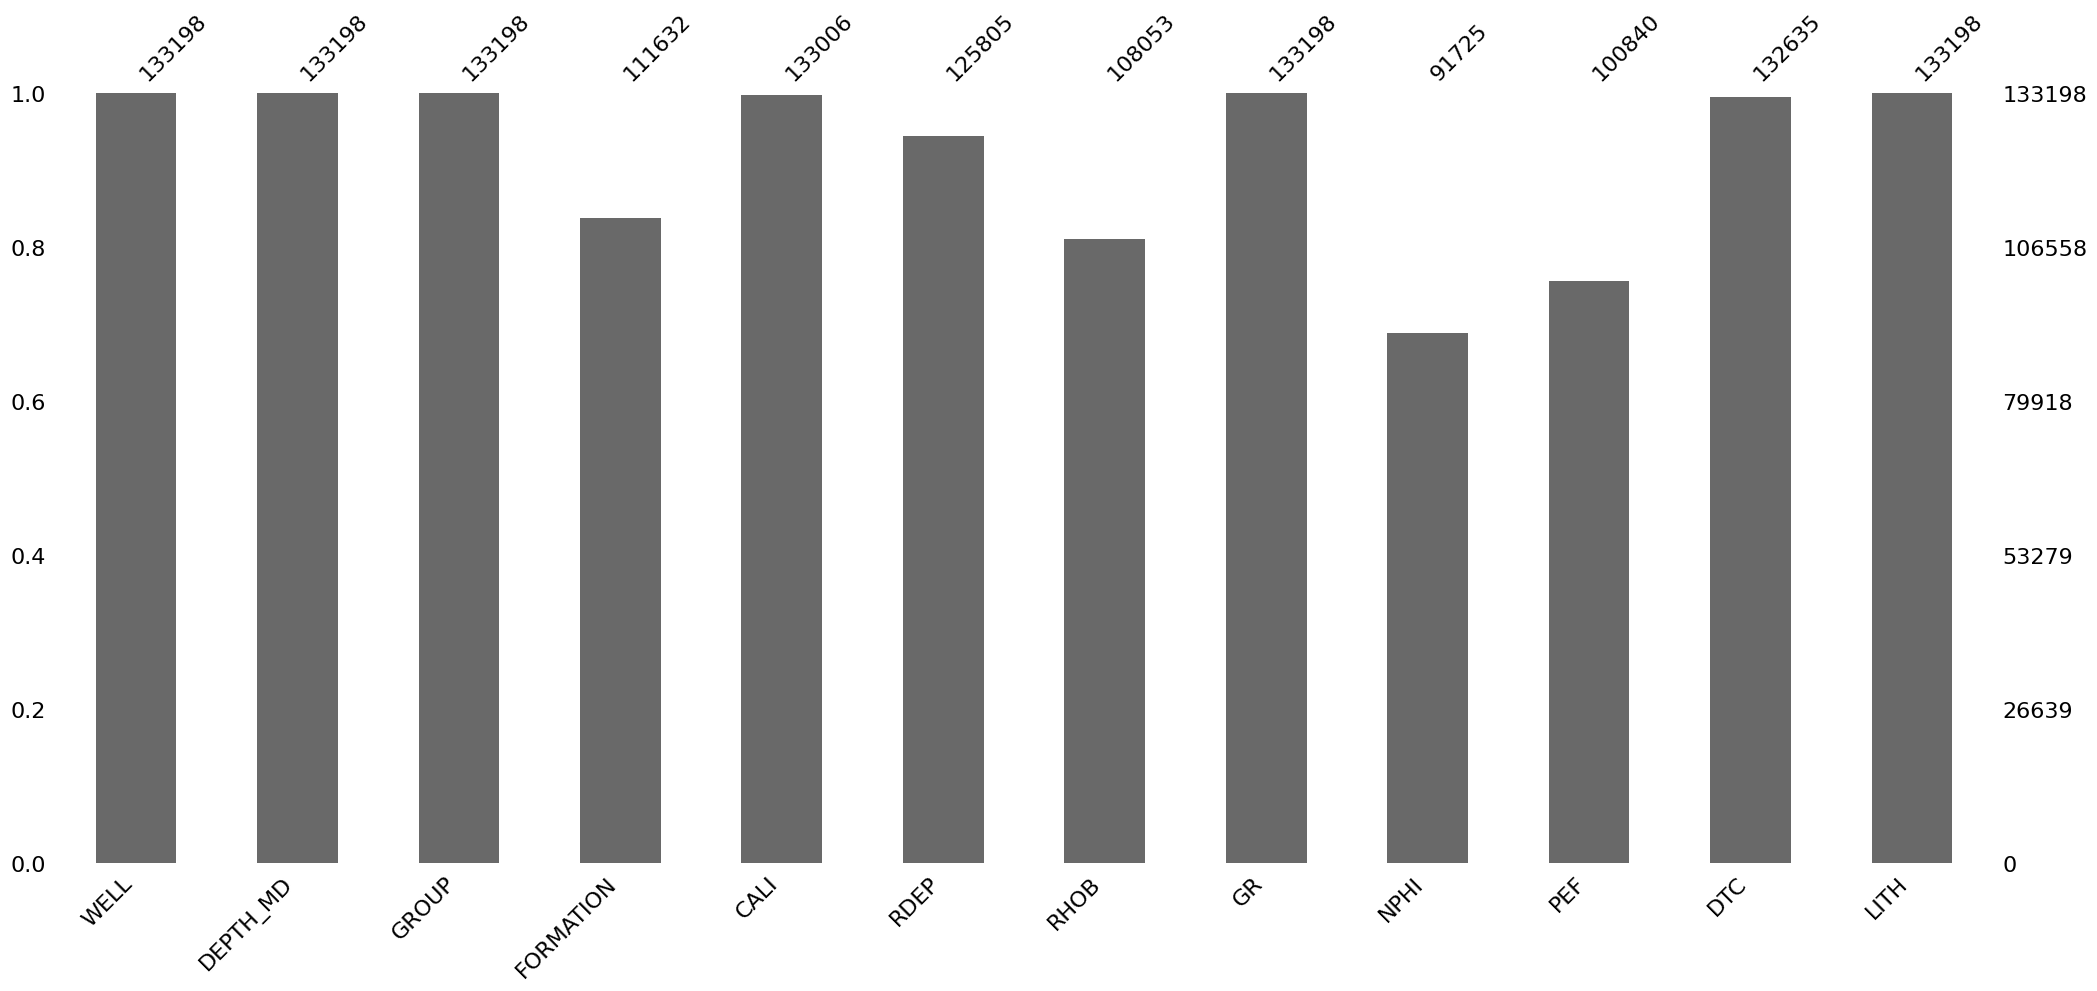

In [12]:
mno.bar(df)

In [13]:
df.dropna(inplace=True)

<Axes: >

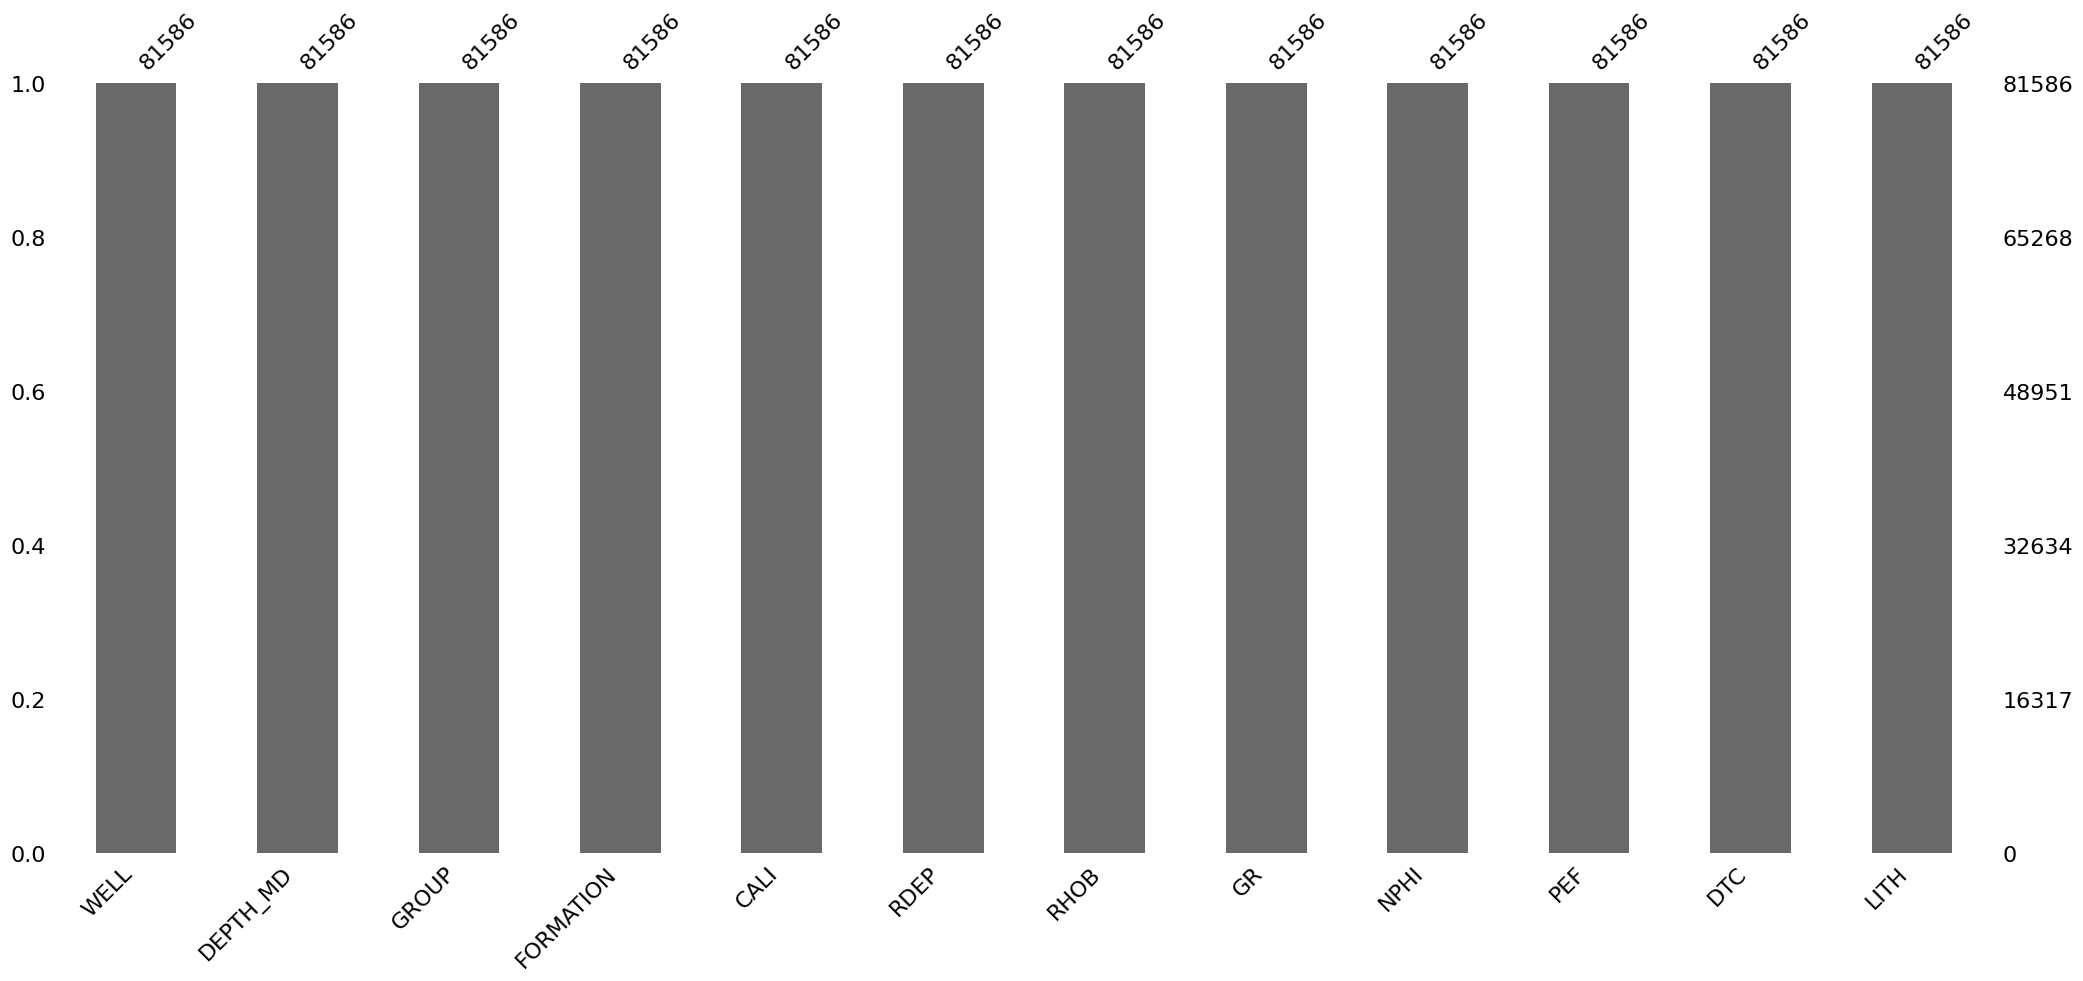

In [14]:
mno.bar(df)

In [15]:
df['LITH'].value_counts()

LITH
Shale              48705
Limestone          10973
Sandstone          10076
Sandstone/Shale     4578
Marl                3715
Chalk               2254
Tuff                1034
Dolomite              98
Anhydrite             75
Coal                  58
Halite                20
Name: count, dtype: int64

## Creating the Random Forest Model
### Preparing Data

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [17]:
# Select inputs and target
X = df[['RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC']]
y = df['LITH']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Creating Model

In [19]:
clf = RandomForestClassifier()

In [20]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
y_pred = clf.predict(X_test)

### Evaluating Model

In [22]:
accuracy_score(y_test, y_pred)

0.911586860598137

In [23]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

      Anhydrite       0.96      0.96      0.96        28
          Chalk       0.84      0.73      0.78       685
           Coal       0.86      0.43      0.57        14
       Dolomite       0.83      0.44      0.58        34
         Halite       1.00      0.75      0.86         4
      Limestone       0.88      0.88      0.88      3329
           Marl       0.86      0.73      0.79      1143
      Sandstone       0.90      0.88      0.89      3004
Sandstone/Shale       0.76      0.64      0.70      1338
          Shale       0.94      0.98      0.96     14603
           Tuff       0.78      0.59      0.67       294

       accuracy                           0.91     24476
      macro avg       0.87      0.73      0.79     24476
   weighted avg       0.91      0.91      0.91     24476



In [24]:
# Classification Report


In [25]:
# Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[   27     0     0     0     0     1     0     0     0     0     0]
 [    0   500     0     0     0   175     0     6     4     0     0]
 [    0     0     6     0     0     0     0     0     0     8     0]
 [    0     0     0    15     0     5     1     9     4     0     0]
 [    0     0     0     0     3     0     0     0     0     1     0]
 [    1    72     0     2     0  2925    70    43    19   191     6]
 [    0    13     0     0     0   139   840    13     6   131     1]
 [    0     4     0     1     0    41    18  2644   127   164     5]
 [    0     3     0     0     0    10    23   146   862   293     1]
 [    0     0     1     0     0    40    25    76   108 14318    35]
 [    0     0     0     0     0     2     5    17     1    97   172]]


In [26]:
labels = ['Shale', 'Sandstone', 'Sandstone/Shale', 'Limestone', 'Tuff',
       'Marl', 'Anhydrite', 'Dolomite', 'Chalk', 'Coal', 'Halite']
labels.sort()

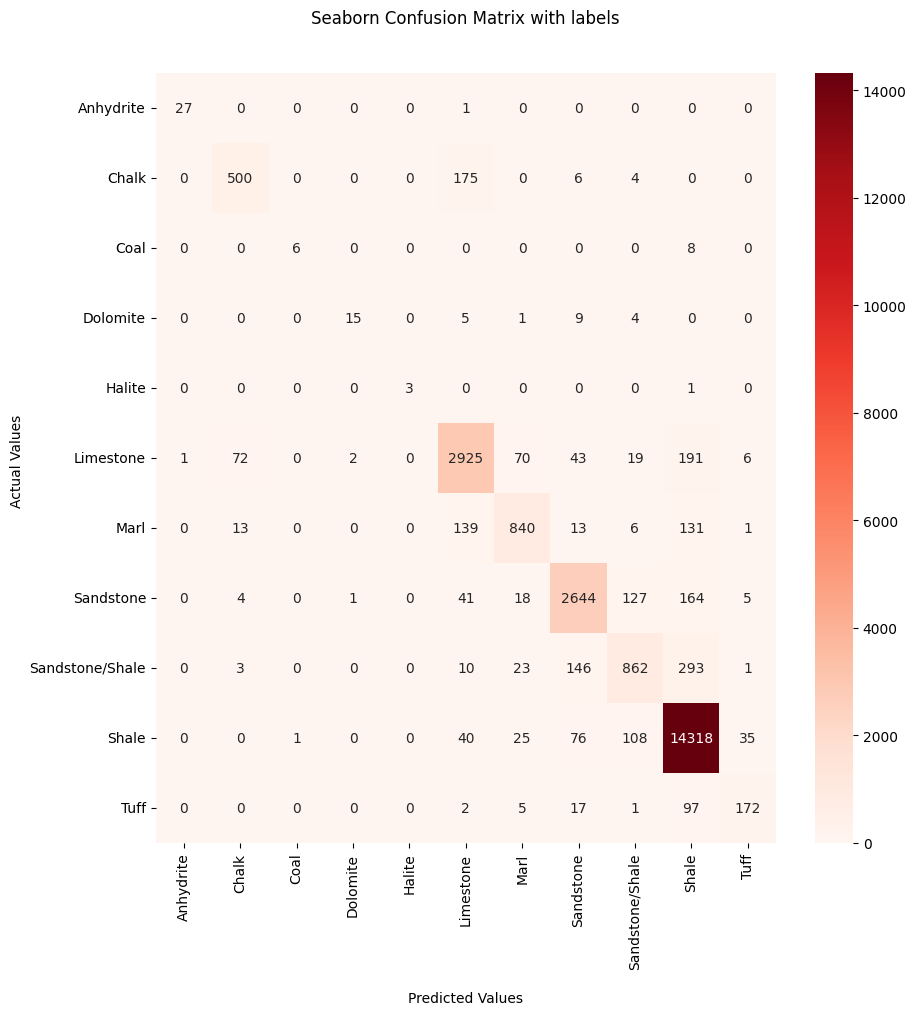

In [27]:

fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds', fmt='.0f',
                xticklabels=labels, 
                yticklabels = labels)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');



Credits: https://github.com/andymcdgeo/Petrophysics-Python-Series/tree/master